## Prepare data from Kaggle
You can get the data from: https://www.kaggle.com/datasets/msambare/fer2013

using api command to bring data to the notebook, but first upload your Kaggle.json file

In [1]:
import os, shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d msambare/fer2013

 76% 46.0M/60.3M [00:00<00:00, 101MB/s]
100% 60.3M/60.3M [00:00<00:00, 128MB/s]


In [ ]:
!unzip \*.zip && rm *.zip


This dataset contains only train and test data, and we want to make validation data to get better accuracy for the our model, so we will first merge test and train data in one file then split the data into train, validation and test using split-folder package


In [4]:
os.listdir('/content')

['.config', 'train', 'kaggle.json', 'test', 'sample_data']

Looks like the there are only train and test file, let's make a validation file by mergeing all the data together and resplit it.

In [5]:
#check test data
base = '/content/'
folder = os.path.join(base,'test')
test_list =os.listdir(folder)
print(folder)
print(test_list)
for c in range(len(test_list)):
  print('{} : {}'.format(test_list[c],len(os.listdir(os.path.join(folder,test_list[c])))))

/content/test
['disgust', 'neutral', 'angry', 'fear', 'surprise', 'sad', 'happy']
disgust : 111
neutral : 1233
angry : 958
fear : 1024
surprise : 831
sad : 1247
happy : 1774


In [6]:
#check train data
train_folder = os.path.join(base,'train')
train_list =os.listdir(train_folder)
print(train_folder)
print(train_list)
for c in range(len(train_list)):
  print('{} : {}'.format(train_list[c],len(os.listdir(os.path.join(train_folder,train_list[c])))))

/content/train
['disgust', 'neutral', 'angry', 'fear', 'surprise', 'sad', 'happy']
disgust : 436
neutral : 4965
angry : 3995
fear : 4097
surprise : 3171
sad : 4830
happy : 7215


In [7]:
#transfer test data to train data to make one file contains all
for c in range(len(test_list)):
  emofolders = os.path.join(folder,test_list[c])
  imgs = os.listdir(emofolders)
  for i in range(len(imgs)):
    shutil.move(emofolders+'/' + imgs[i], '/content/train/{}'.format(test_list[c]))
  

In [8]:
train_folder = os.path.join(base,'train')
train_list =os.listdir(train_folder)
print(train_folder)
print(train_list)
for c in range(len(train_list)):
  print('{} : {}'.format(train_list[c],len(os.listdir(os.path.join(train_folder,train_list[c])))))

/content/train
['disgust', 'neutral', 'angry', 'fear', 'surprise', 'sad', 'happy']
disgust : 547
neutral : 6198
angry : 4953
fear : 5121
surprise : 4002
sad : 6077
happy : 8989


As you see, all data is collected in one folder!

In [9]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
shutil.rmtree('/content/test') # remove test folder after taking all of its imgs

using splitfolders to split the collected data into train,val, and test.

In [11]:
import splitfolders
splitfolders.ratio("train", output="splited_data",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values
    #ratio =(train,validation, and test respectivly)

Copying files: 35887 files [00:07, 4793.97 files/s]


In [12]:
os.listdir('/content')

['.config', 'splited_data', 'train', 'kaggle.json', 'sample_data']

In [13]:
main = '/content/splited_data'
train_dir = os.path.join(main,'train')
val_dir = os.path.join(main,'val')
test_dir = os.path.join(main,'test')
os.listdir(val_dir)

['disgust', 'neutral', 'angry', 'fear', 'surprise', 'sad', 'happy']

In [14]:
for name in ['train','val','test']:
  dir = os.path.join(main, name)
  for dirname in os.listdir(dir):
    imgs = os.path.join(dir,dirname)
    print('{},{} :'.format(name , dirname)+str(len(os.listdir(imgs))))


train,disgust :382
train,neutral :4338
train,angry :3467
train,fear :3584
train,surprise :2801
train,sad :4253
train,happy :6292
val,disgust :109
val,neutral :1239
val,angry :990
val,fear :1024
val,surprise :800
val,sad :1215
val,happy :1797
test,disgust :56
test,neutral :621
test,angry :496
test,fear :513
test,surprise :401
test,sad :609
test,happy :900


## Data Augmentation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
batch_size = 100
target_shape = (300 , 300)
train_image_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.1,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_gen = train_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size = target_shape,
                                                     class_mode='categorical')

Found 25117 images belonging to 7 classes.


In [92]:
image_gen = ImageDataGenerator(rescale=1./255)
val_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=val_dir,
                                                     shuffle=True,
                                                     target_size = target_shape,
                                                     class_mode='categorical')

Found 7174 images belonging to 7 classes.


In [93]:
test_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=test_dir,
                                                     shuffle=True,
                                                     target_size = target_shape,
                                                     class_mode='categorical')

Found 3596 images belonging to 7 classes.


In [24]:
train_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

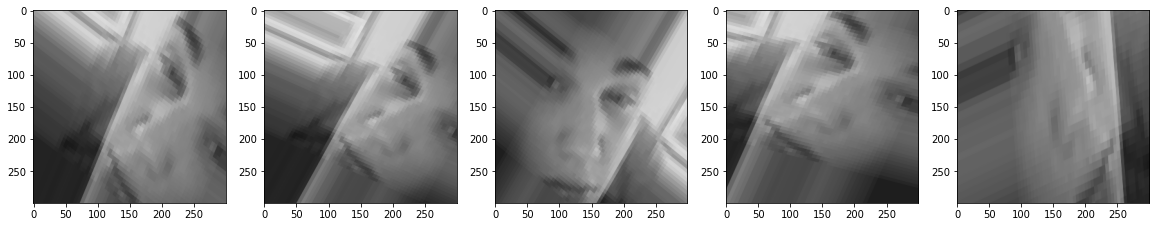

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
augmented_images = [train_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)        

## Creating the model

In [43]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(300,300, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation= 'softmax')) #number of classses

In [59]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **You can better accuracy by making the number of epochs higher but since one epoch take around 40 mins, it was fair for me to set it as just one**

In [60]:
epochs = 1 # less epochs because the training take much time
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit_generator(
    train_gen,
    steps_per_epoch=int(np.ceil(train_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_gen,
    validation_steps=int(np.ceil(val_gen.n / float(batch_size))),
    #callbacks= [early_stopping_monitor] 
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


252/252 [==============================] - 2819s 11s/step - loss: 1.9880 - accuracy: 0.2422 - val_loss: 1.7688 - val_accuracy: 0.2633


## Prediction
Let's make prediction with one of the test data and make sure if the model get it right. 
#### **NOTE**:  SINCE IT WAS JUST ONE EPOCH, IT WILL BE AS SEE FORM THE ACCURACY.

In [63]:
model.evaluate(test_gen[0][0].tolist(),test_gen[0][1].astype(int).tolist()) # test_gen contains both imgs and their labels 

4/4 [==============================] - 3s 683ms/step - loss: 1.7249 - accuracy: 0.2600


[1.7248653173446655, 0.25999999046325684]

In [87]:
img_number = 23
prediction = model.predict(np.array([test_gen[0][0][img_number]]))
prediction

array([[0.13859016, 0.01281181, 0.15359764, 0.23062938, 0.15949549,
        0.15595156, 0.14892395]], dtype=float32)

In [88]:
acc =np.argmax(prediction)
acc

3

In [89]:
classes = list(train_gen.class_indices.keys())
encodings = list(train_gen.class_indices.values())
position = encodings.index(acc)
classes[position]

'happy'

**The model predicted happy let's see if that's right!**

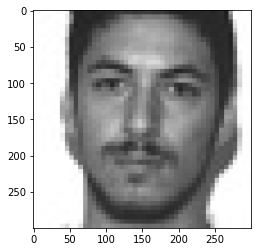

In [90]:
plt.imshow(test_gen[0][0][img_number])

In [91]:
test_gen[0][1].astype(int).tolist()[img_number]

[0, 0, 0, 0, 1, 0, 0]

In [86]:
train_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

**Seems he was just natural and wasn't as the model predicted (please consider it was just one epoch).**